### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [347]:
data = pd.read_csv('data/coupons.csv')

In [349]:
data.head(15)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [350]:
print(data.isnull().sum())
data.info()
data.describe

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  -----

<bound method NDFrame.describe of            destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h

3. Decide what to do about your missing data -- drop, replace, other...

In [112]:
# replace Null values in survey responses with 'never'. There are obviously a number of
# ways to handle these null values, but in the absence of any context I thought this made sense
replacement_string = 'never'
columns_to_replace = ['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50']
data[columns_to_replace] = data[columns_to_replace].fillna(replacement_string)
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


4. What proportion of the total observations chose to accept the coupon? 



Y
1    0.568433
0    0.431567
Name: count, dtype: float64


Text(0.5, 1.0, 'Count Plot of coupon accepts and declines')

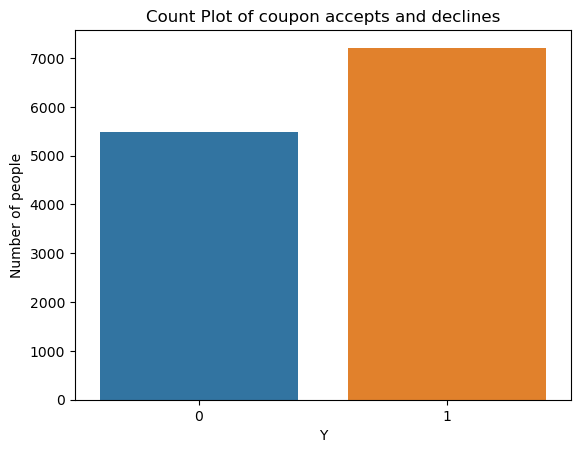

In [293]:
# find number of people who accepted/declined coupons, and divide by total people
acceptrate = data['Y'].value_counts()/data['Y'].count()
vals = data['Y'].value_counts()
print(acceptrate)
#56% of customers accepted a coupon
sns.countplot(x='Y', data=data)
plt.ylabel('Number of people')
plt.title("Count Plot of coupon accepts and declines")


5. Use a bar plot to visualize the `coupon` column.

Text(0.5, 1.0, 'Bar Plot of coupon accept rates by coupon type')

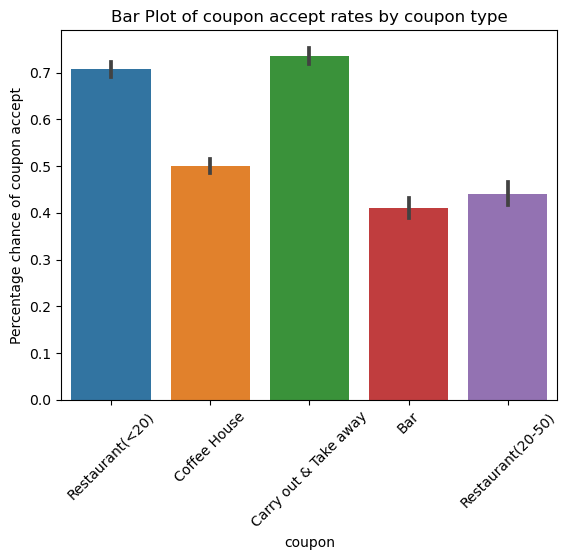

In [294]:
#create barplot with sns
sns.barplot(x='coupon', y='Y', data=data)
plt.xticks(rotation=45)
plt.ylabel('Percentage chance of coupon accept')
plt.title("Bar Plot of coupon accept rates by coupon type")

6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Histogram of Temperature')

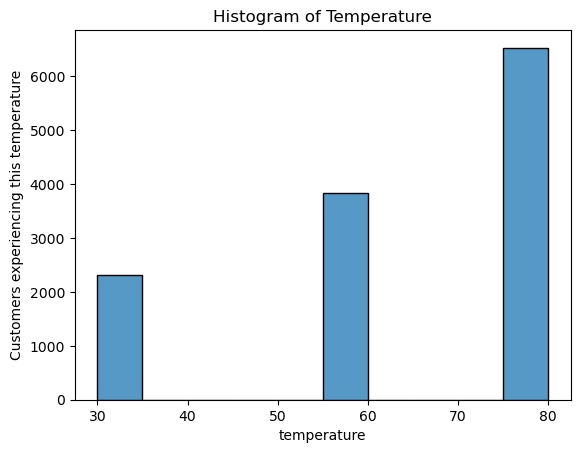

In [296]:
sns.histplot(data['temperature'], bins=10)
plt.ylabel('Customers experiencing this temperature')
plt.title("Histogram of Temperature")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


Text(0.5, 1.0, 'Count of Acceptance for Bar Coupon')

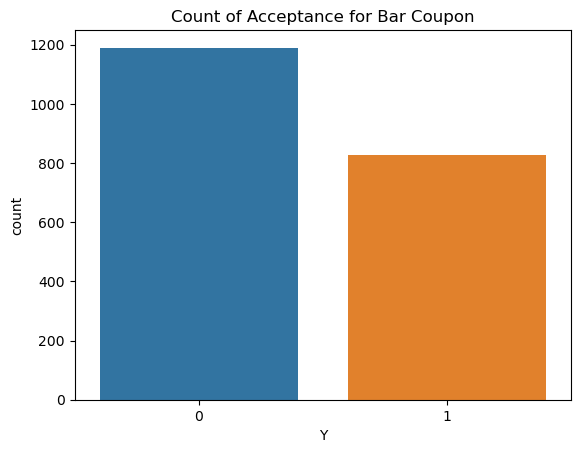

In [360]:
# Create new df with just bar data
bardata = data[data['coupon'] == 'Bar']
#visualize data
sns.countplot(x='Y', data=bardata)
plt.title('Count of Acceptance for Bar Coupon')

2. What proportion of bar coupons were accepted?


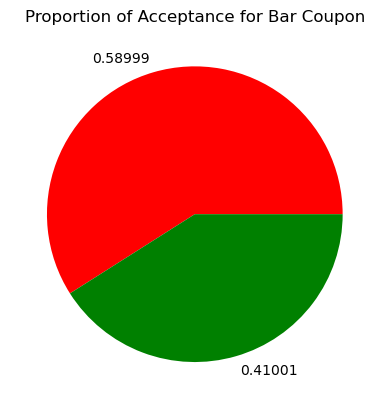

In [418]:
# Find number of accept/declines, divide by total number 
ratio = bardata['Y'].value_counts()/bardata['Y'].count()
#41% of bar coupons were accepted. Countplot reinforces this
custom_colors = {0: 'red', 1: 'green', }
plt.pie(ratio, labels=ratio.values.round(5), colors=[custom_colors[val] for val in ratio.index])
plt.title('Proportion of Acceptance for Bar Coupon')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


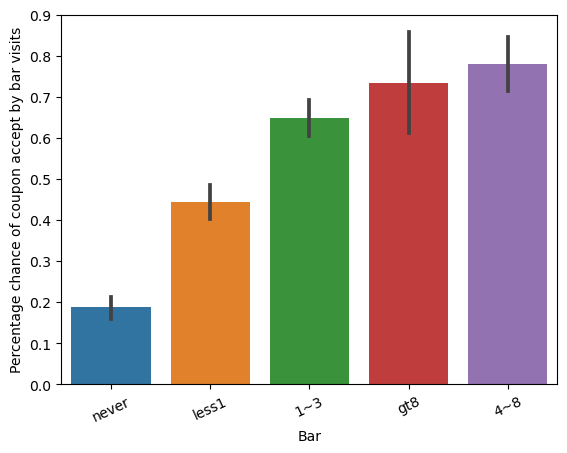

Text(0.5, 1.0, 'Count of Bargoing Groups')

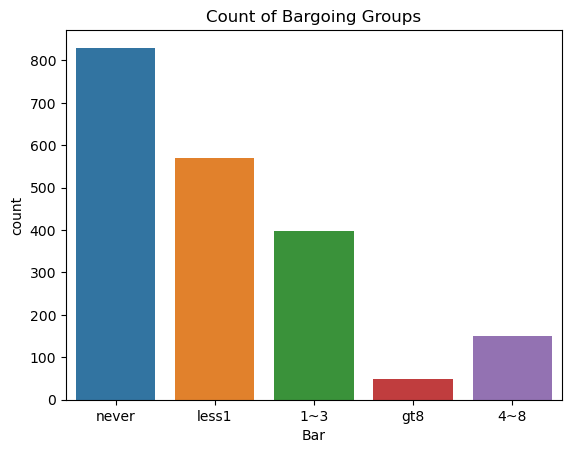

In [376]:
# Initial visualization for data
# Barplot for proportions
sns.barplot(x='Bar', y='Y', data=bardata)
plt.xticks(rotation=25)
plt.ylabel('Percentage chance of coupon accept by bar visits')
plt.show()
# Countplot for count
sns.countplot(x='Bar', data=bardata)
plt.title('Count of Bargoing Groups')

Y
1    0.768844
0    0.231156
Name: proportion, dtype: float64
Y
0    0.707857
1    0.292143
Name: proportion, dtype: float64


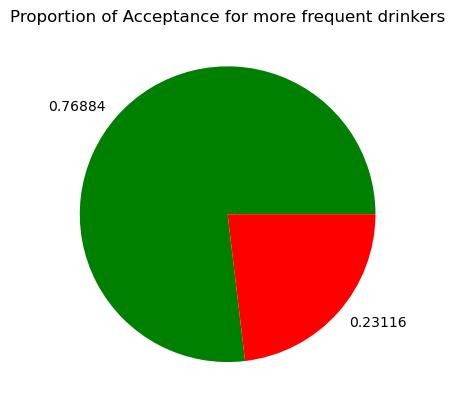

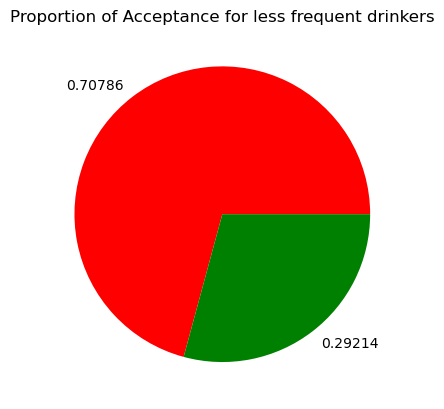

In [393]:
# Create desired lists
moredrink = ['gt8', '4~8']
lessdrink = ['never', 'less1', '1-3']

# Create boolean masks for each group
moredrink_mask = bardata['Bar'].isin(moredrink)
lessdrink_mask = bardata['Bar'].isin(lessdrink)

# Calculate acceptance rates for each group
big_drinkers = bardata[moredrink_mask]['Y'].value_counts(normalize=True)
small_drinkers = bardata[lessdrink_mask]['Y'].value_counts(normalize=True)
print(big_drinkers)
print(small_drinkers)

custom_colors = {0: 'red', 1: 'green', }

# Pie chart for more frequent drinkers, proper colors
plt.pie(big_drinkers, labels=big_drinkers.values.round(5), colors=[custom_colors[val] for val in big_drinkers.index])
plt.title('Proportion of Acceptance for more frequent drinkers')
plt.show()


# Pie chart for less frequent drinkers, proper colors
plt.pie(small_drinkers, labels=small_drinkers.values.round(5), colors=[custom_colors[val] for val in small_drinkers.index])
plt.title('Proportion of Acceptance for less frequent drinkers')
plt.show()

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


Acceptance rate for those 25+ that visit bar 1+/mo: Y
1    0.695238
0    0.304762
Name: proportion, dtype: float64


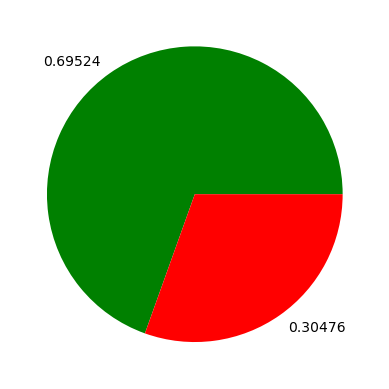

Acceptance rate for those <25 that visit bar 1+/mo: Y
1    0.670455
0    0.329545
Name: proportion, dtype: float64


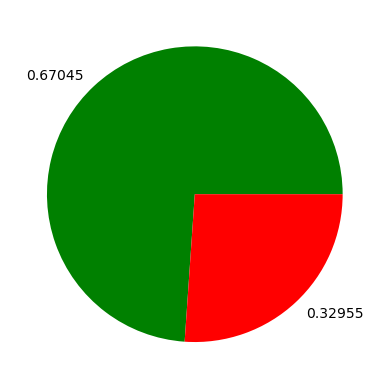

Acceptance rate for those <25 that visit bar <1/mo: Y
0    0.605505
1    0.394495
Name: proportion, dtype: float64


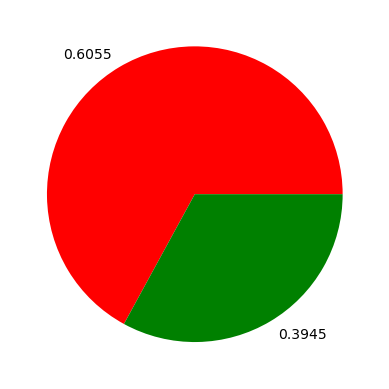

Acceptance rate for those 25+ that visit bar <1/mo: Y
0    0.739049
1    0.260951
Name: proportion, dtype: float64


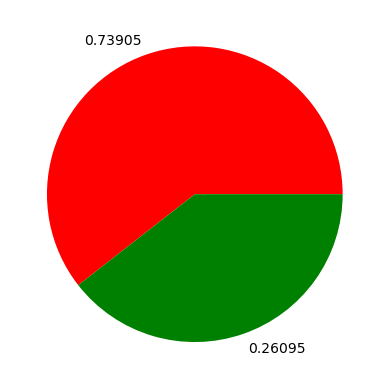

In [405]:
# Create desired lists
older = ['31','41', '50plus', '36', '46', '26']
younger = ['21', 'below21']
oftendrink = ['gt8', '4~8', '1~3']
seldomdrink = ['never', 'less1']

# Create boolean masks for each drinking group, seldom or often
oftendrink_mask = bardata['Bar'].isin(oftendrink)
seldomdrink_mask = bardata['Bar'].isin(seldomdrink)

# Create boolean masks for each age group, over/under 25
olddrink_mask = bardata['age'].isin(older)
youngdrink_mask = bardata['age'].isin(younger)

# Calculate acceptance rates for each of 4 groups
big_old_drinkers = bardata[oftendrink_mask & olddrink_mask]['Y'].value_counts(normalize=True)
small_young_drinkers = bardata[seldomdrink_mask & youngdrink_mask]['Y'].value_counts(normalize=True)
big_young_drinkers = bardata[oftendrink_mask & youngdrink_mask]['Y'].value_counts(normalize=True)
small_old_drinkers = bardata[seldomdrink_mask & olddrink_mask]['Y'].value_counts(normalize=True)
# Pie plots 
print("Acceptance rate for those 25+ that visit bar 1+/mo:", big_old_drinkers)
plt.pie(big_old_drinkers, labels=big_old_drinkers.values.round(5), colors=[custom_colors[val] for val in big_old_drinkers.index])
plt.show()
print("Acceptance rate for those <25 that visit bar 1+/mo:",big_young_drinkers)
plt.pie(small_old_drinkers, labels=big_young_drinkers.values.round(5), colors=[custom_colors[val] for val in big_young_drinkers.index])
plt.show()
print("Acceptance rate for those <25 that visit bar <1/mo:",small_young_drinkers)
plt.pie(big_young_drinkers, labels=small_young_drinkers.values.round(5), colors=[custom_colors[val] for val in small_young_drinkers.index])
plt.show()
print("Acceptance rate for those 25+ that visit bar <1/mo:",small_old_drinkers)
plt.pie(small_young_drinkers, labels=small_old_drinkers.values.round(5), colors=[custom_colors[val] for val in small_old_drinkers.index])
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


Acceptance rate for those without kid passengers, not FFF, that visit bars 1+/mo: Y
1    0.717949
0    0.282051
Name: proportion, dtype: float64


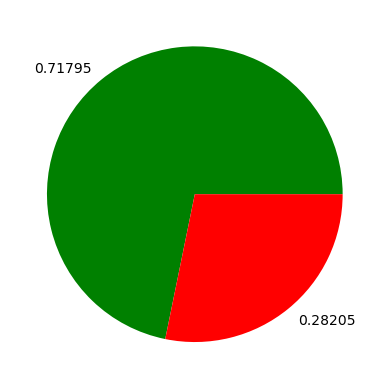

In [410]:
#Create desired lists
notkid = ['Friend(s)', 'Partner']
occulist = ['Farming Fishing & Forestry']
# Create boolean mask for passenger group
pass_notkid = bardata['passanger'].isin(notkid)
# Create boolean mask for each occupation group
occ_other = bardata['occupation'] != 'Farming Fishing & Forestry'

often_nokidpass_nofff = bardata[oftendrink_mask & pass_notkid & occ_other]['Y'].value_counts(normalize=True)
print("Acceptance rate for those without kid passengers, not FFF, that visit bars 1+/mo:", big_nokidpass_nofff)
plt.pie(often_nokidpass_nofff, labels=often_nokidpass_nofff.values.round(5), colors=[custom_colors[val] for val in often_nokidpass_nofff.index])
plt.show()

# Customers fitting the no kid passengers, not FFF, that visit bars 1+/mo accepted at a 71.8% rate

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



Acceptance rate for those younger than 30, that visit bars 1+/mo: Y
1    0.721739
0    0.278261
Name: proportion, dtype: float64


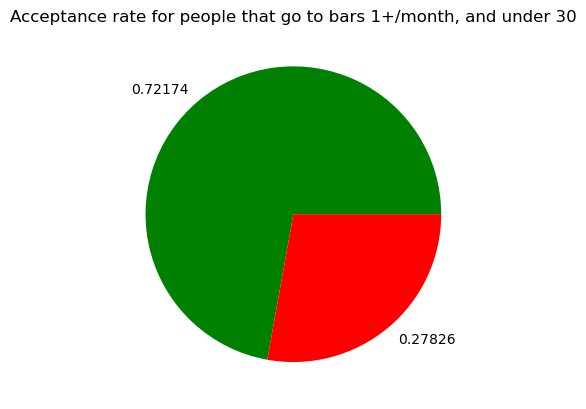

In [413]:
#go to bars more than once a month and are under the age of 30

#Create desired lists
youngerthirty = ['21', 'below21', '26']
oftendrink = ['gt8', '4~8', '1~3']

# Create boolean mask for drinking group
drinker_mask = bardata['Bar'].isin(oftendrink)
# Create boolean masks for age group
young_mask = bardata['age'].isin(youngerthirty)


underthirty_drink = bardata[young_mask & drinker_mask]['Y'].value_counts(normalize=True)
print("Acceptance rate for those younger than 30, that visit bars 1+/mo:", underthirty_drink)
plt.pie(underthirty_drink, labels=underthirty_drink.values.round(5), colors=[custom_colors[val] for val in underthirty_drink.index])
plt.title("Acceptance rate for people that go to bars 1+/month, and under 30")
plt.show()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the data, potential customers that visit bars regularly (more than once per month) are more likely to accept the bar coupon. This held true regardless of the other characteristics, with frequent bargoers accepting at approximately 70%.
This makes sense that those who regularly attend bars would be more likely to make use of a bar coupon than those that do not frequent bars. It seems that receiving a coupon is not enough incentive to visit a bar if the person was not going to go barhopping anyways. 
Amazon/company should focus their efforts on providing coupons to people who visit bars regularly.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

I analyzed the Coffee Coupon group. I looked at which factors made people more likely to accept the coffee coupon. I was curious if customers would be more likely to accept the coupon based on where they were driving, and if frequent coffee house visitors would accept coupons at a high rate. 

In [419]:
#Create dataframe for only Coffee coupons
coffeedata = data[data['coupon'] == 'Coffee House']
coffeedata.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


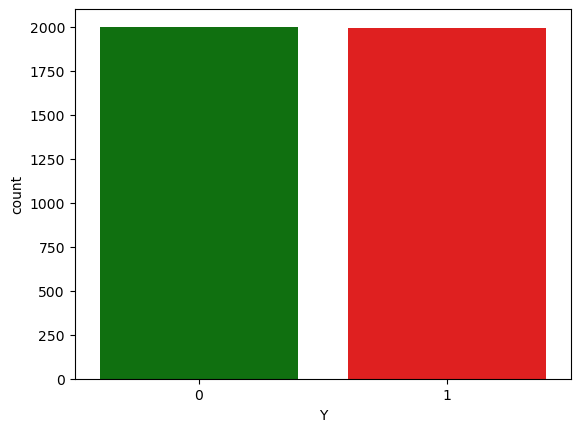

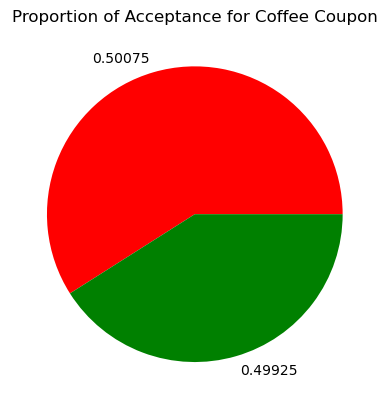

In [421]:
#determine percentage of accepts of Coffee coupons
coff_ratio = coffeedata['Y'].value_counts()/coffeedata['Y'].count()
# Create visualizations
sns.countplot(x='Y', data=coffeedata)
plt.show()
plt.pie(ratio, labels=coff_ratio.values.round(5), colors=[custom_colors[val] for val in coff_ratio.index])
plt.title('Proportion of Acceptance for Coffee Coupon')
plt.show()
#49% of coffee coupons were accepted

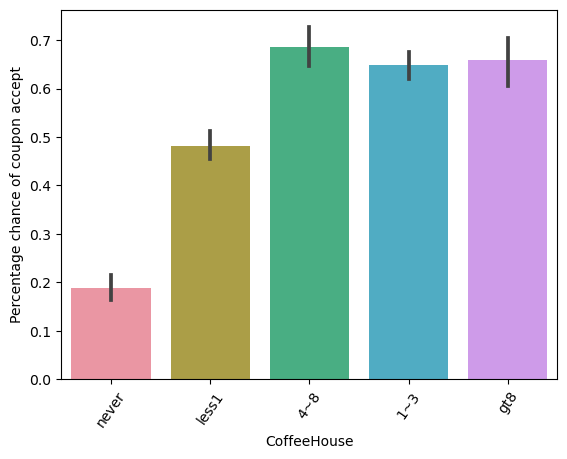

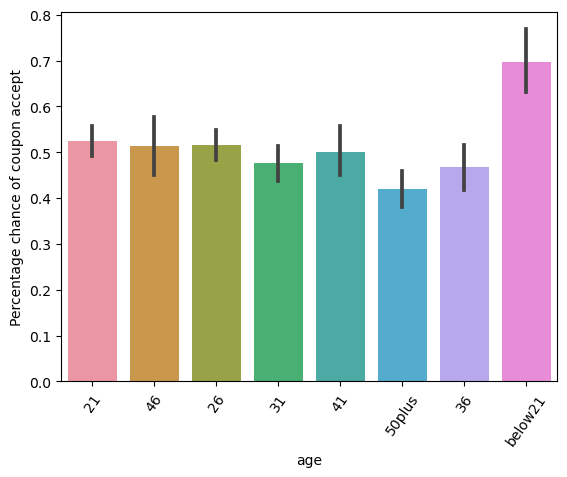

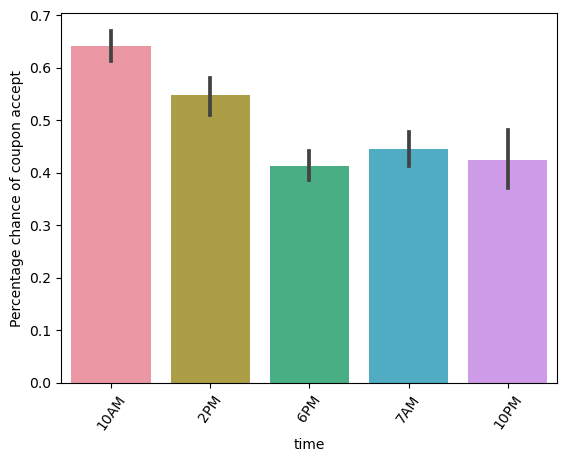

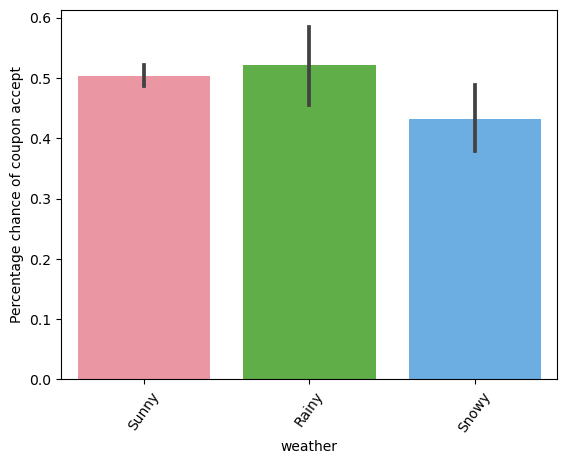

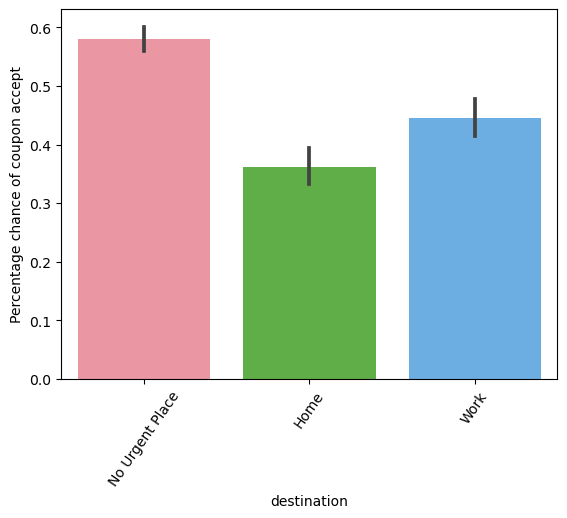

In [422]:
# Create bar plots to see which attributes correlate with accepting coffee coupons
sns.barplot(x='CoffeeHouse', y='Y', data=coffeedata)
plt.xticks(rotation=55)
plt.ylabel('Percentage chance of coupon accept')
plt.show()
#
sns.barplot(x='age', y='Y', data=coffeedata)
plt.xticks(rotation=55)
plt.ylabel('Percentage chance of coupon accept')
plt.show()
#
sns.barplot(x='time', y='Y', data=coffeedata)
plt.xticks(rotation=55)
plt.ylabel('Percentage chance of coupon accept')
plt.show()
#
sns.barplot(x='weather', y='Y', data=coffeedata)
plt.xticks(rotation=55)
plt.ylabel('Percentage chance of coupon accept')
plt.show()
#
sns.barplot(x='destination', y='Y', data=coffeedata)
plt.xticks(rotation=55)
plt.ylabel('Percentage chance of coupon accept')
plt.show()
#take these, add direction in, make examples

As seen in these bar plots, people are most likely to accept the coupon if they are under 21, are headed in the same direction, in the 10am time window, not headed to an urgent place, and it is raining outside. 
Coffee shops should target potential customers that fit these criteria.
I thought it might be interesting to look at the percentage of acceptance for people fitting a few of these criteria, with the thought that they would accept at extremely high rates. My analysis was limited by the small data set, with a small number of customers meeting multiple criteria of strong correlation.

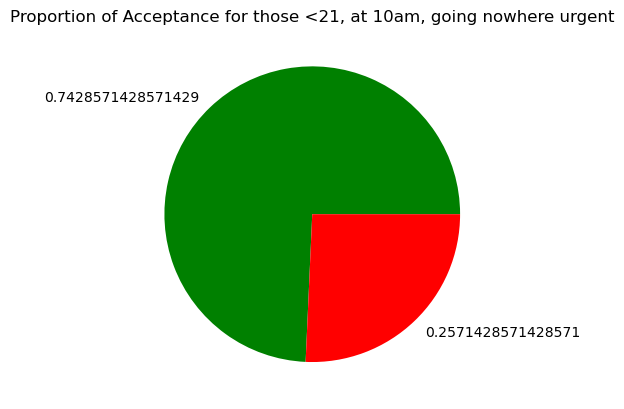

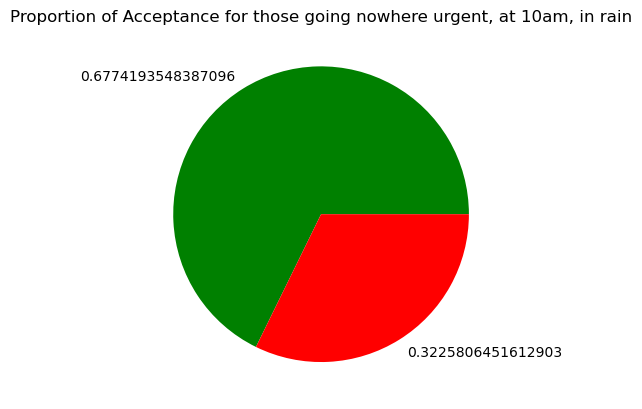

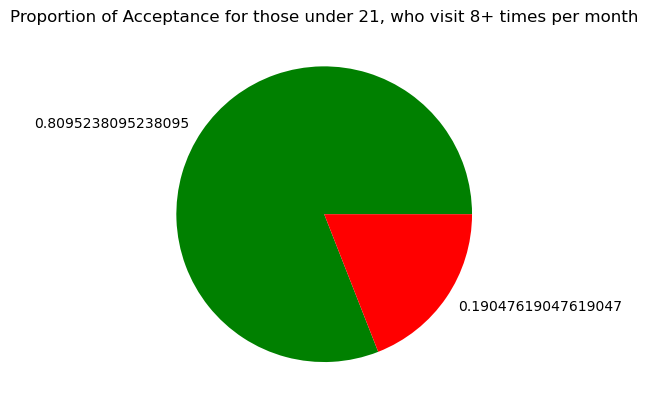

In [426]:
#Create boolean masks for groups with high acceptance rates
coff_age = coffeedata['age'] == 'below21'
coff_dir = coffeedata['direction_same'] == 1
coff_time = coffeedata['time'] == '10AM'
coff_dest = coffeedata['destination'] == 'No Urgent Place'
coff_weather = coffeedata['weather'] == 'Rainy'
coff_pro = coffeedata['CoffeeHouse'] == 'gt8'


coffee_specimen = coffeedata[coff_age & coff_time & coff_dest]['Y'].value_counts(normalize=True)
#print(coffee_specimen)
plt.pie(coffee_specimen,labels=coffee_specimen.values)
plt.title('Proportion of Acceptance for those <21, at 10am, going nowhere urgent')
plt.show()

coffee_2 = coffeedata[coff_dest & coff_time & coff_weather]['Y'].value_counts(normalize=True)
plt.pie(coffee_2,labels=coffee_2.values)
plt.title('Proportion of Acceptance for those going nowhere urgent, at 10am, in rain')
plt.show()

coffee_3 = coffeedata[coff_age & coff_pro]['Y'].value_counts(normalize=True)
plt.pie(coffee_3,labels=coffee_3.values)
plt.title('Proportion of Acceptance for those under 21, who visit 8+ times per month')
plt.show()